# 💰 How Well Do Jobs and Skills Pay for Data Analysts?

This notebook analyzes salary trends across data-related roles in the United States, with a deeper focus on how **specific skills impact pay for Data Analysts**.

We explore both **job-level salaries** and **skill-level compensation** to understand where higher earnings come from.

### 📌 **Methodology**

1. Evaluate median salary for the **top 6 data-related roles**
2. Analyze **median salary per skill** for Data Analysts
3. Visualize:
   - Highest-paying skills
   - Most in-demand skills

---

## 🛠 **Setup: Import Libraries and Load Data**

We will use the **full job postings dataset (2023–2024)** from [datanerd.tech](https://datanerd.tech) to analyze US Data Analyst skills.  

> **Dataset Source:**  
> - Originally part of the Python Data Analyst course, extended with full dataset covering 2023 through the latest update.  
> - File: `job_postings_flat.csv` (local CSV, not pushed to GitHub due to size >100MB).  
> - Updated twice a year to reflect the most recent job trends.

We filter to **2024** to focus on the most recent complete year, ensuring our analysis of skill demand and salary is current and relevant.

In [1]:
# Import required libraries
import ast
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Configure data source - Base project directory
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Full path to CSV using relative structure
CSV_PATH = os.path.join(BASE_DIR, 'data', 'Job_Postings_2023-2024.csv')

# Load data automatically
if os.path.exists(CSV_PATH):
    print(f"Loading local CSV from '{CSV_PATH}'...")
    df = pd.read_csv(CSV_PATH)
else:
    print("Local CSV not found. Loading dataset from Hugging Face...")
    dataset = load_dataset('lukebarousse/data_jobs')
    df = dataset['train'].to_pandas()

# Clean and prepare data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df[df['job_posted_date'].dt.year == 2024]

print(f"Data loaded successfully!")

Loading local CSV from '/Users/nadia_rozman/Python_for_Data_Analytics/Project/data/Job_Postings_2023-2024.csv'...
Data loaded successfully!


## 📊 **Salary Distribution by Job Title (US Only)**

This section examines salary distributions for the most common data roles in the United States.


In [2]:
# Filter US jobs with valid salary
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

## **Identify Top 6 Data Roles**

In [3]:
# Identify top 6 most common data-related roles
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [4]:
# Order job titles by median salary for better visualization
job_order = (
    df_US_top6
    .groupby('job_title_short')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
    .index
)

## 📈 **Salary Distribution Visualization**

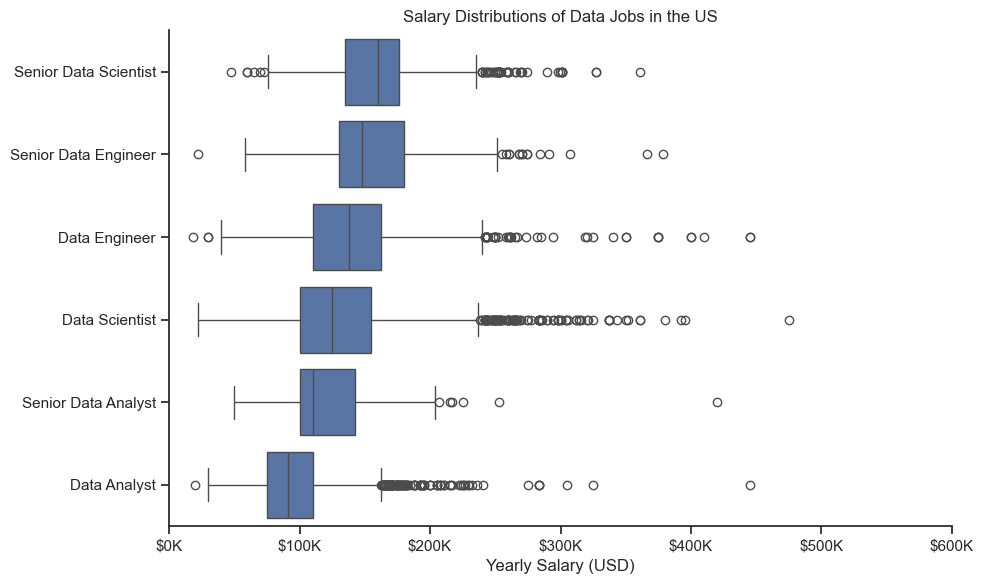

Figure saved successfully!


In [ ]:
# Create boxplot for salary distributions
fig, ax = plt.subplots(figsize=(10,6))

sns.set_theme(style='ticks')
sns.boxplot(
    data=df_US_top6,
    x='salary_year_avg',
    y='job_title_short',
    order=job_order,
    ax=ax
)
sns.despine(ax=ax)

ax.set_title('Salary Distributions of Data Jobs in the US')
ax.set_xlabel('Yearly Salary (USD)')
ax.set_ylabel('')
ax.set_xlim(0, 600000)

# Format x-axis as $XXXK
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
ax.xaxis.set_major_formatter(ticks_x)

fig.tight_layout()

# Save figure
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
os.makedirs(IMAGES_DIR, exist_ok=True)

# Output file name
FIG_FILENAME = '3_Salary_Distributions_of_Data_Jobs_in_the_US.png'
FIG_PATH = os.path.join(IMAGES_DIR, FIG_FILENAME)

plt.savefig(FIG_PATH, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved successfully!")

## 🔍 **Median Salary vs Skills for Data Analysts**

We now narrow the analysis to **Data Analyst roles in the United States** to understand how individual skills influence salary outcomes.


In [7]:
# Filter for Data Analyst roles in US with salary data
df_DA_US = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States')
].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode skills into individual rows for aggregation
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
787774,100000.0,sql
787774,100000.0,python
787774,100000.0,aws
787774,100000.0,spark
787774,100000.0,kafka


## 🏆 **Highest-Paying Skills for Data Analysts**

In [8]:
# Compute median salary and count per skill
df_DA_top_pay = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='median', ascending=False)
    .head(10)
)

df_DA_top_pay

,count,median
job_skills,,
unreal,1,229138.0
blazor,1,161000.0
fortran,1,157500.0
mariadb,2,150500.0
no-sql,5,150000.0
zoom,45,145000.0
graphql,43,141420.0
yarn,1,140000.0
atlassian,8,139750.0


## 📊 **Most In-Demand Skills for Data Analysts**

In [9]:
# Compute most frequently listed skills
df_DA_skills = (
    df_DA_US
    .groupby('job_skills')['salary_year_avg']
    .agg(['count', 'median'])
    .sort_values(by='count', ascending=False)
    .head(10)
    .sort_values(by='median', ascending=False)
)

df_DA_skills

,count,median
job_skills,,
python,1633,100000.0
aws,247,100000.0
sql,2321,97574.0
tableau,1249,97500.0
r,869,96500.0
power bi,925,93000.0
sas,730,91500.0
excel,2597,82500.0
powerpoint,340,77562.5


## 📉 **Skill Pay vs Demand Visualization**

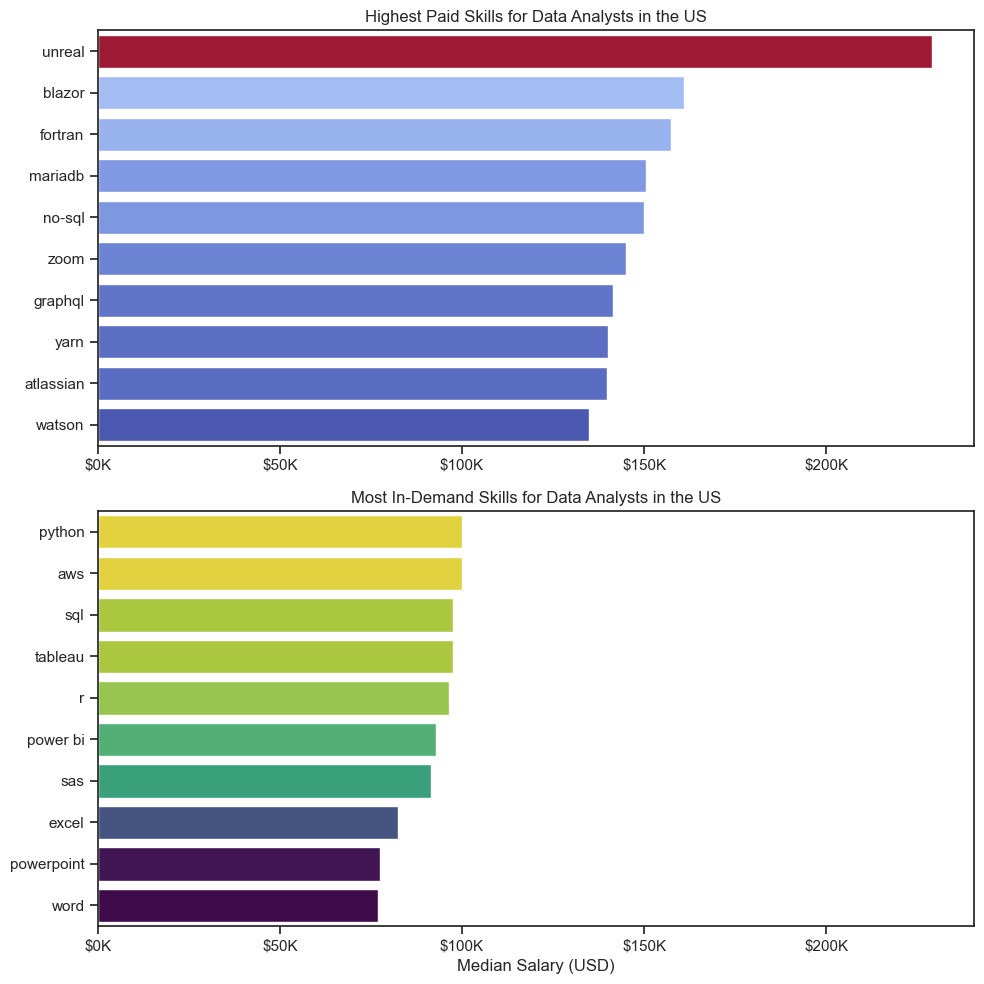

Figure saved successfully!


In [ ]:
# Create dual bar chart comparing highest paid vs most in-demand skills
fig, ax = plt.subplots(2, 1, figsize=(10,10))

sns.set_theme(style='ticks')

# Highest Paid Skills
sns.barplot(
    data=df_DA_top_pay,
    x='median',
    y=df_DA_top_pay.index,
    hue='median',
    ax=ax[0],
    palette='coolwarm'
)
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

# Most In-Demand Skills
sns.barplot(
    data=df_DA_skills,
    x='median',
    y=df_DA_skills.index,
    hue='median',
    ax=ax[1],
    palette='viridis'
)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')
)

plt.tight_layout()

# Save figure
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))  
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
os.makedirs(IMAGES_DIR, exist_ok=True)

# Output file name
FIG_FILENAME = '4_Highest_Paid_and_Most_In_Demand_Skills_for_Data_Analysts_in_the_US.png'
FIG_PATH = os.path.join(IMAGES_DIR, FIG_FILENAME)

plt.savefig(FIG_PATH, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved successfully!")

## 📌 **Key Takeaways**

### **The Demand-Pay Paradox Defines Career Strategy**
There is **zero overlap** between the top 10 highest-paid skills and the top 10 most in-demand skills for Data Analysts. High-demand skills (Python, SQL, Tableau) command median salaries of **$85K-$95K**, while specialized niche skills (Unreal, Blazor, Fortran) reach **$150K-$215K**. This reveals a fundamental trade-off: *common skills maximize employability but compress earnings, while rare skills unlock premium pay but limit job opportunities.*

### **Seniority Trumps Title in Compensation**
Career progression follows a clear salary trajectory with **20-30% premiums** per level:
- **Data Analyst:** ~$90K median (IQR: $75K-$110K)
- **Senior Data Analyst:** ~$110K median (IQR: $95K-$130K)
- **Data Scientist:** ~$135K median (IQR: $115K-$165K)
- **Senior Data Scientist:** ~$165K median (IQR: $145K-$195K)

The **Data Analyst → Senior Data Scientist** progression represents an **83% salary increase** (~$75K gain). Notably, Senior Data Engineers and Senior Data Scientists have similar median salaries (~$160K-$165K), suggesting that senior technical roles converge in compensation regardless of specialization.

### **Niche Skills Signal Advanced Capabilities**
The highest-paid skills reveal three premium categories:

**Legacy/Specialized Systems ($150K-$180K):**
- Fortran, MariaDB, No-SQL databases
- Signal experience with complex enterprise systems or scientific computing

**Game Development/3D Tools ($180K-$215K):**
- Unreal Engine ($215K), Blazor
- Indicate cross-functional expertise beyond traditional analytics

**Enterprise Collaboration Tools ($145K-$160K):**
- Atlassian, Zoom, Yarn, GraphQL, Watson
- Suggest roles bridging data analytics with product/engineering teams

These skills don't appear in high-demand lists because they're *proxies for seniority and specialization*, not entry requirements.

### **Foundation Skills Are Table Stakes, Not Differentiators**
The most in-demand skills cluster tightly in the **$85K-$95K** range:
- Python, AWS, SQL: ~$95K
- Tableau, R, Power BI: ~$90K
- SAS, Excel, PowerPoint, Word: ~$85K

This **$10K spread** (just 12% variance) across widely different skill types indicates that *having* these skills is expected—they don't command premiums because they're baseline requirements. The market pays for *what else* you bring beyond these fundamentals.

### **Cloud and Programming Command Modest Premiums**
Within high-demand skills, technical depth provides marginal advantages:
- **Python ($95K)** edges out **SQL ($93K)** by just 2%
- **AWS ($95K)** shows no premium over core programming
- **R ($90K)** trails Python despite being more specialized

This suggests that *proficiency breadth* (knowing multiple tools) matters less than *application depth* (using tools to solve complex problems). A Data Analyst who uses Python for advanced analytics doesn't automatically out-earn one who uses it for basic scripting.

### **The "Traditional Tools" Penalty**
Microsoft Office skills (Excel, PowerPoint, Word) cluster at the bottom of the salary distribution (~$85K), approximately **10-15% below** technical tools like Python and SQL. While these skills appear in job postings, their prevalence across all office workers means they carry no scarcity value in the data analytics market.

---

### 💼 **Strategic Career Recommendations**

**For Early-Career Data Analysts ($75K-$95K):**

1. **Build the foundation first** - Master Python, SQL, and one BI tool (Tableau/Power BI). These are non-negotiable for job access, even if they don't maximize salary.

2. **Don't chase niche skills too early** - Learning Fortran or Unreal won't help if you can't land interviews. High-paying niche skills require context that comes from experience.

3. **Focus on projects over tools** - The market pays ~$95K regardless of whether you know Python, AWS, or SQL. What matters is *what you've built* with these tools.

**For Mid-Career Professionals ($95K-$130K):**

4. **Develop strategic specialization** - Add one differentiated skill area:
   - **Data Engineering path:** Airflow, Spark, dbt, cloud infrastructure
   - **Analytics Engineering path:** Version control (Git), CI/CD, testing frameworks
   - **Product Analytics path:** A/B testing, experimentation platforms, product metrics

5. **Target senior analyst or specialist roles** - The $110K Senior Data Analyst median represents a 22% raise from base analyst roles with manageable skill requirements.

6. **Consider cross-functional exposure** - Skills like Atlassian and GraphQL suggest product/engineering collaboration, which pays $145K-$160K.

**For Senior Professionals Targeting $140K+:**

7. **Pursue deep technical specialization** - Senior Data Scientists ($165K) and Senior Data Engineers ($160K) require expertise beyond common tools. Focus on:
   - Advanced ML/AI (model deployment, MLOps, custom algorithms)
   - Data infrastructure (pipeline optimization, system architecture)
   - Domain-specific technical skills (geospatial, time series, NLP)

8. **Combine versatility with expertise** - The highest earners demonstrate both broad technical competency *and* specialized knowledge that's rare in the market.

9. **Look beyond job titles** - Data Engineer and Data Scientist roles converge in compensation at senior levels (~$135K-$165K median). Choose based on work preference, not title.

---

### 🎯 **The Optimal Skill Investment Strategy**

**Phase 1 - Employability (0-2 years):**
Invest 100% in high-demand foundation skills to maximize interview callbacks and job offers. Salary will cluster around $85K-$95K regardless of specific tool choices.

**Phase 2 - Differentiation (2-5 years):**
Add strategic specialization in one technical area (cloud, engineering, ML) to target $110K-$130K senior analyst or specialist roles. Choose specialization based on interest and market opportunity, not salary differences.

**Phase 3 - Premium Positioning (5+ years):**
Develop rare, high-value expertise that signals advanced capability. Target roles requiring cross-functional technical leadership. At this stage, your combination of foundational skills + deep specialization + proven impact unlocks $140K+ compensation.

**Key Insight:** The path to top compensation isn't learning obscure tools—it's *using common tools to solve uncommon problems*, then strategically adding specialized capabilities that signal seniority and domain mastery. The market pays for demonstrated impact, not résumé keywords.